<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="right"/>

<p align="center">Análisis de Datos</p>


<p align="center"> Grupo: 91X </p>

 <p align="center"> Tarea 4 - Algoritmos de Aprendizaje no Supervisado</p>

 <p align="center">  Presentado por: Ángela Bibiana Ortegón Fuentes</p>

<p align="center"> Código: 1007415324</p>

 <p align="center">  Tutora: Sandra M. Patiño</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> Noviembre 26 de 2024</p>

# Agrupamiento en Hierarchical Clustering

## Pasos de la Actividad

1. Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s

### 1. Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [143]:
#Cargar las librerias para el ejercicio hierarchical clustering

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

## Ejercicio

El Hierarchical Clustering es una técnica de clustering no supervisado que permite agrupar a los clientes según sus comportamientos o características comunes.es un conjunto de datos utilizado comúnmente en análisis de marketing, en particular para realizar segmentaciones de clientes, análisis de comportamiento y optimización de campañas publicitarias. Este dataset contiene información de una segmentación de clientes de centros comerciales.

In [6]:
# Cargar el conjunto de datos en la variable data
info = pd.read_csv('C:/Users/Pedro/Documents/Mall_Customers.csv', sep=';')

In [29]:
info.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Tipo de datos

CustomerID: Id asignado al cliente
Gender: Genero del cliente
Age: Edad del cliente 
Annual Income (k$): Ingresos anuales del cliente 
Spending Score (1-100): Puntuacíón de gastos del cliente


In [32]:
info.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

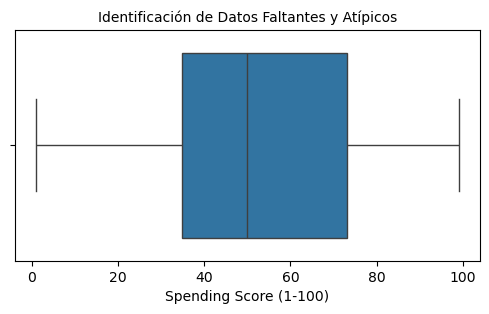

In [34]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Spending Score (1-100)']) #Recientes
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

### Identificar datos Faltantes

In [36]:
# Identificar columnas con datos faltantes
print(info.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## Solamente si aplica se realiza los siguientes pasos
* **Eliminar filas con datos faltantes**: Puedes eliminar las filas o columnas con valores faltantes si son pocas y no impactan significativamente el análisis.
data_clean = data.dropna()

* **Rellenar valores faltantes con la media de la columna** Rellenar los valores faltantes con un valor como la media, mediana, o moda de la columna.

data['columna'] = data['columna'].fillna(data['columna'].mean())

* **Imputación avanzada: Usar técnicas más sofisticadas como KNN o modelos de regresión para predecir los valores faltantes.**
Técnicas adicionales:

Interpolación: Puedes usar la interpolación para llenar los valores faltantes en series temporales.
data['columna'] = data['columna'].interpolate()


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

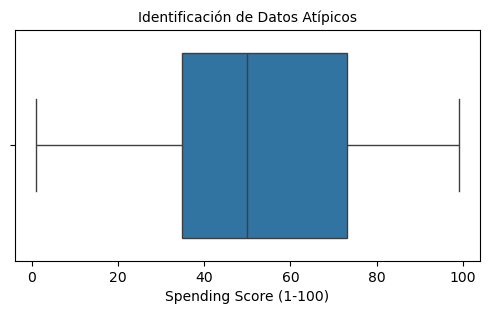

In [39]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [63]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((info['Spending Score (1-100)']<nivel_minimo)|(info['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [65]:
# Filtra Datos Atípicos

Datos=info[(info['Spending Score (1-100)']<nivel_maximo)&(info['Spending Score (1-100)']>nivel_minimo)]

In [85]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [ ]:
Para seleccionar las características más relevantes del dataset Marketing Campaign para entrenar un modelo de Hierarchical Clustering, es importante entender cuáles variables pueden realizar  segmentación de clientes. 

* comportamientos de compra
* patrones de respuesta del cliente

1. Las características del cliente brindan información sobre el perfil básico del tipo de cliente:

* Age: La edad del cliente puede influir en sus patrones de compra y preferencias.
* Gender: El tipo de genero del cliente puede influir en que tipo de productos compra

Las características son útiles para la segmentación de clientes y permiten identificar patrones demográficos que pueden correlacionarse con comportamientos específicos.

2. Selección de características de comportamiento de compra
Estas características se enfocan en cómo los clientes interactúan con la empresa en términos de frecuencia y volumen de gasto:

* Annual income: Ingreso anual del cliente lo cual permite ver cuanto puede gastar
* Spending score: Puntuación de gasto es la calificación que se da al cliente por el nivel de gasto realizado


In [111]:
# Filtrar columnas del modelo 

Datos1 = Datos[["Age","Gender","Annual Income (k$)","Spending Score (1-100)"]]

In [113]:
# Revisión de los datos de las variables objetivo
Datos1.head(40)

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,19,Male,15,39
1,21,Male,15,81
2,20,Female,16,6
3,23,Female,16,77
4,31,Female,17,40
5,22,Female,17,76
6,35,Female,18,6
7,23,Female,18,94
8,64,Male,19,3
9,30,Female,19,72


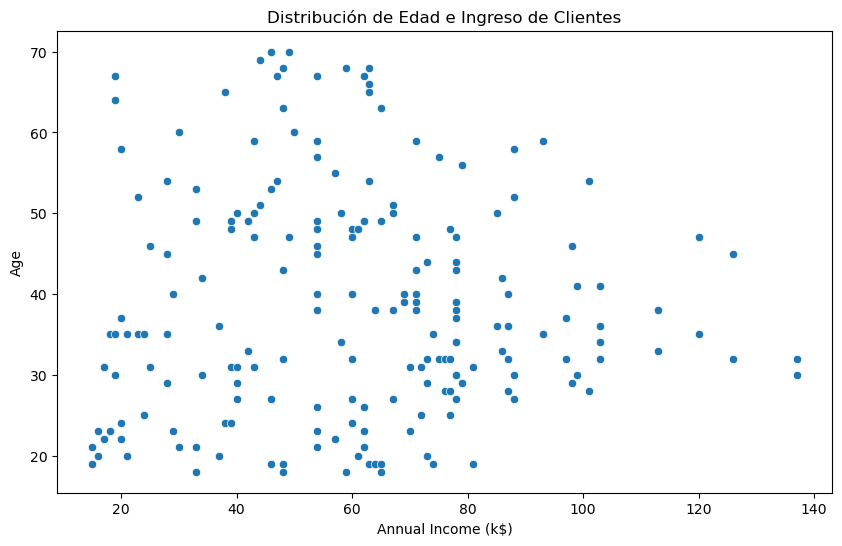

In [115]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datos1['Annual Income (k$)'], y=Datos1['Age'])
plt.title('Distribución de Edad e Ingreso de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

In [ ]:
### 4. Entrenar el modelo configurando los diferentes hiperparámetros

**Preparación de los Datos**
Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [154]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])

**Visualización del Dendrograma**
Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

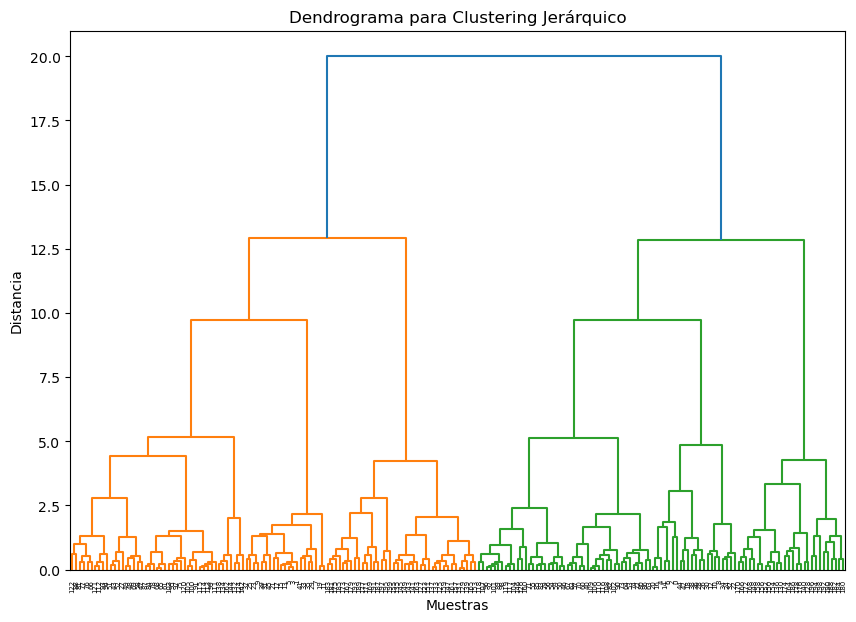

In [156]:

# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

En este gráfico, cada fusión (cada rama que se une) representa la combinación de dos clústeres o muestras.
Las ramas largas indican que las muestras o clústeres que se están uniendo tienen gran disimilitud, mientras que las ramas cortas indican que los elementos fusionados son muy similares.
En función de la distancia en el eje Y, puedes determinar cuántos clústeres deseas extraer del análisis de agrupamiento, ya que el corte en el dendrograma a una cierta altura te dará el número de grupos a conservar.

Interpretación:

Ingresos: Las muestras con ingresos similares tenderán a unirse en ramas cortas, lo que indica que las personas con ingresos parecidos tienden a tener características similares en otras variables.

Edad: Los grupos de edad similarmente agrupados pueden aparecer en el dendrograma con ramas cortas. Las personas de edades similares pueden compartir comportamientos de compra similares, especialmente cuando se observan en el contexto de otros factores como el ingreso.

Recency(Reciente): Este atributo indica cuán recientemente una persona ha realizado una compra o interacción. En el dendrograma. Las diferencias en recencia podrían ser un factor clave al separar a los clientes que interactúan más frecuentemente de aquellos que no lo hacen.

'MntWines' (Gasto en vinos): Similar a los ingresos, el gasto en vinos probablemente influirá en la agrupación. Los clústeres que incluyen individuos con altos gastos en vinos se separarán de aquellos que gastan menos en este producto, lo que puede revelar patrones de compra de productos específicos.

In [160]:

# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']] = Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].fillna(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Índice de Davies-Bouldin: 1.1277290061047858


In [ ]:
### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

In [ ]:
 * **Gráfico de Dispersión para Visualización de Clusters**

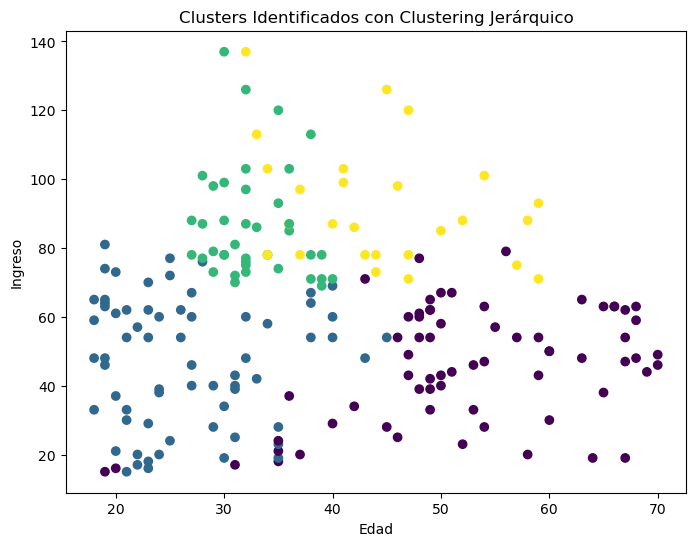

In [176]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Este gráfico te muestra cómo se agrupan las muestras según las características seleccionadas, en este caso, Edad e Ingreso. Los puntos de diferentes colores representan diferentes clusters.

* **Gráfico de Silueta**

Este gráfico muestra cuán similar es cada punto a su propio grupo en comparación con otros grupos. Un valor alto (cercano a 1) indica que los puntos están bien agrupados, mientras que un valor bajo (cercano a -1) indica que están mal asignados.

Silhouette Score: 0.3614512741691407


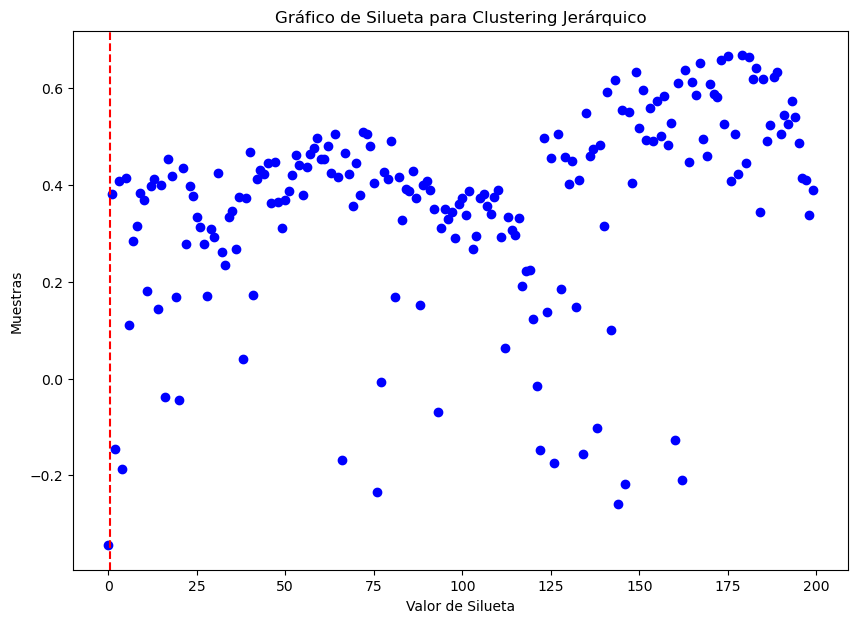

In [166]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

### **7. Interpretar, analizar y documentar los resultados obtenidos**

* La edad del cliente pueda que influya en sus patrones de compra y preferencias.
* El genero de la persona podría influir en los gastos realizados en base a sus ingresos.
* En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +1, eso nos indica que la mayoría de los puntos están correctamente asignados a su cluster y que los clusters están bien separados.
* Un valor de 0.3214 de Coeficiente de Silhouette indica que los clusters no están tan bien separados ni son tan coherentes. Aunque los puntos dentro de cada cluster están algo agrupados, hay cierta superposición entre los clusters, lo que podría sugerir que los grupos podrían no ser perfectamente distintos.
* El índice de Calinski-Harabasz es de 88.101 es bastante bajo, lo que sugiere que los clusters no son relativamente compactos y no estan bien separados. Lo que indica, un valor inferior a 100  indica que el modelo no ha realizado una buena segmentación.
* Davies-Bouldin de 1.127 indica que los clusters no son perfectamente separados, pero tampoco son excesivamente dispersos o solapados.